Let's exploring some questions from the main part:


Basic part: short description about user

-  Q1: What is your age (# years)?
-  Q2: What is your gender?
-  Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
-  Q5: Select the title most similar to your current role (or most recent title if retired)
-  Q6: For how many years have you been writing code and/or programming?

Programming part: languages 
-  Q7: What programming languages do you use on a regular basis?


Instruments for DS: libs, frameworks and etc
-  Q13: Approximately how many times have you used a TPU (tensor processing unit)?
-  Q14: What data visualization libraries or tools do you use on a regular basis?
-  Q16: Which of the following machine learning frameworks do you use on a regular basis?

Methods: ML, DL, NLP
-  Q15: For how many years have you used machine learning methods?
-  Q17: Which of the following ML algorithms do you use on a regular basis?
-  Q18: Which categories of computer vision methods do you use on a regular basis?
-  Q19: Which of the following natural language processing (NLP) methods do you use on a regular basis?

Work:
-  Q20: What is the size of the company where you are employed?
-  Q22: Does your current employer incorporate machine learning methods into their business?
-  Q23: Select any activities that make up an important part of your role at work:
-  Q24: What is your current yearly compensation ( approximate USD)?

Education topics:
-  Q37: On which platforms have you begun or completed data science courses?
-  Q39: Who/what are your favorite media sources that report on data science topics?

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter(action='ignore')

In [2]:
Kaggle=pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
Kaggle.drop([0],axis=0,inplace=True)
Kaggle['time'] = Kaggle['Time from Start to Finish (seconds)'].astype(int)
Kaggle.drop("Time from Start to Finish (seconds)",axis=1,inplace=True)
Kaggle['time'] = pd.to_datetime(Kaggle['time'], unit='s').dt.time
first_col=Kaggle.pop('time')
Kaggle.insert(0, 'time', first_col)
Kaggle.set_index('time',inplace=True)

In [3]:
Kaggle_NDegree=Kaggle[(Kaggle.Q4 != "Doctoral degree") &
              (Kaggle.Q4 != "Master’s degree") &
              (Kaggle.Q4 != "Bachelor’s degree")&
              (Kaggle.Q4 != "Professional degree")]
Kaggle_WDegree=Kaggle[(Kaggle.Q4 == "Doctoral degree") |
              (Kaggle.Q4 == "Master’s degree") |
              (Kaggle.Q4 == "Bachelor’s degree")|
              (Kaggle.Q4 == "Professional degree")]
Kaggle_WDegree.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,

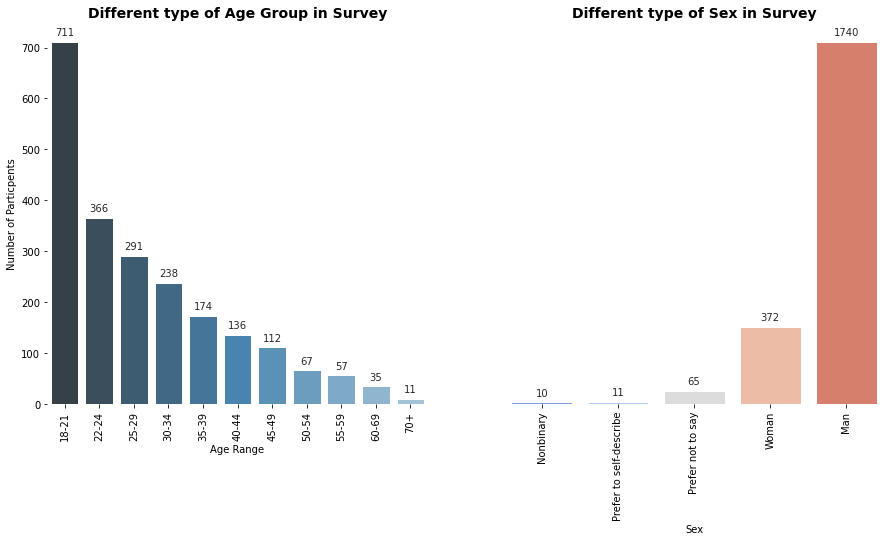

In [4]:
f, axes = plt.subplots(1, 2,figsize=(15,7))
sns.set_style("whitegrid", {'axes.grid' : False})

age=Kaggle_NDegree.Q1.value_counts().sort_values(ascending=False).to_frame()
ax=sns.barplot(data=age,x=age.index,y='Q1',palette="Blues_d",ax=axes[0])
ax.set_title('Different type of Age Group in Survey',fontsize=14, fontweight='bold')
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Particpents')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

sex=Kaggle_NDegree.Q2.value_counts().sort_values(ascending=True).to_frame()
ax1=sns.barplot(data=sex,x=sex.index,y='Q2',palette="coolwarm",ax=axes[1])
ax1.set_title('Different type of Sex in Survey',fontsize=14, fontweight='bold')
ax1.set_xlabel('Sex')
ax1.set_ylabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90);
ax1.set_yticks([])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax1.spines[s].set_visible(False)

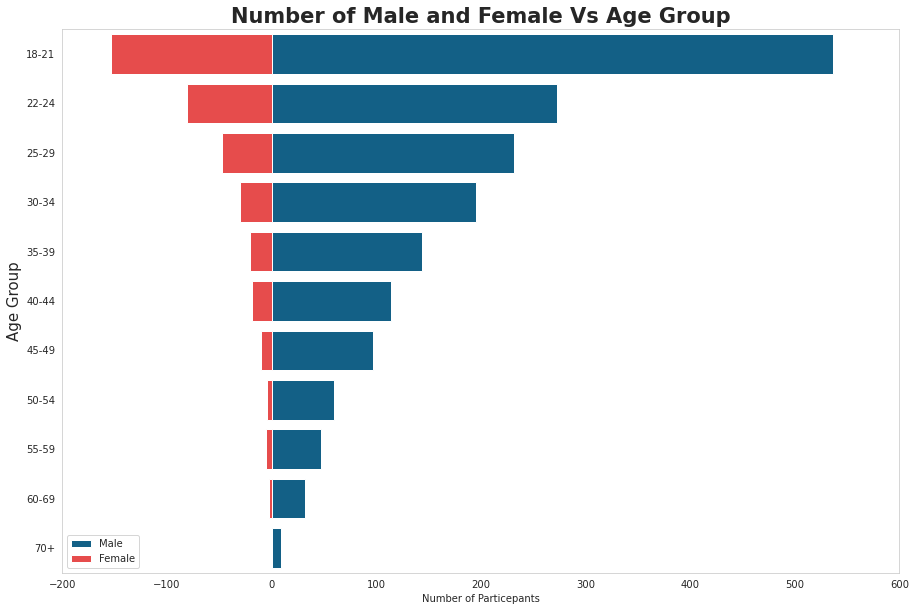

In [5]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
age_sex=Kaggle_NDegree.groupby(['Q1'])['Q2'].value_counts().unstack().sort_index()
man=age_sex["Man"].to_frame()
woman=-age_sex["Woman"].to_frame()

ax=sns.barplot(data=man,x='Man',y=man.index,color="#006699",label='Male')
ax=sns.barplot(data=woman,x='Woman',y=woman.index,color="#ff3333",label='Female')
ax.set_xlim(-200, 600)

  
ax.set_xlabel('Number of Particepants')
ax.set_ylabel('Age Group',fontsize=15)
ax.set_title('Number of Male and Female Vs Age Group',fontsize=21, fontweight='bold')
#annotate
# for p in ax.patches:
#      width = p.get_width()
#      plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
#              '{:1.0f}'.format(abs(width)),
#               ha='center', va='center',rotation=90)

ax.legend();

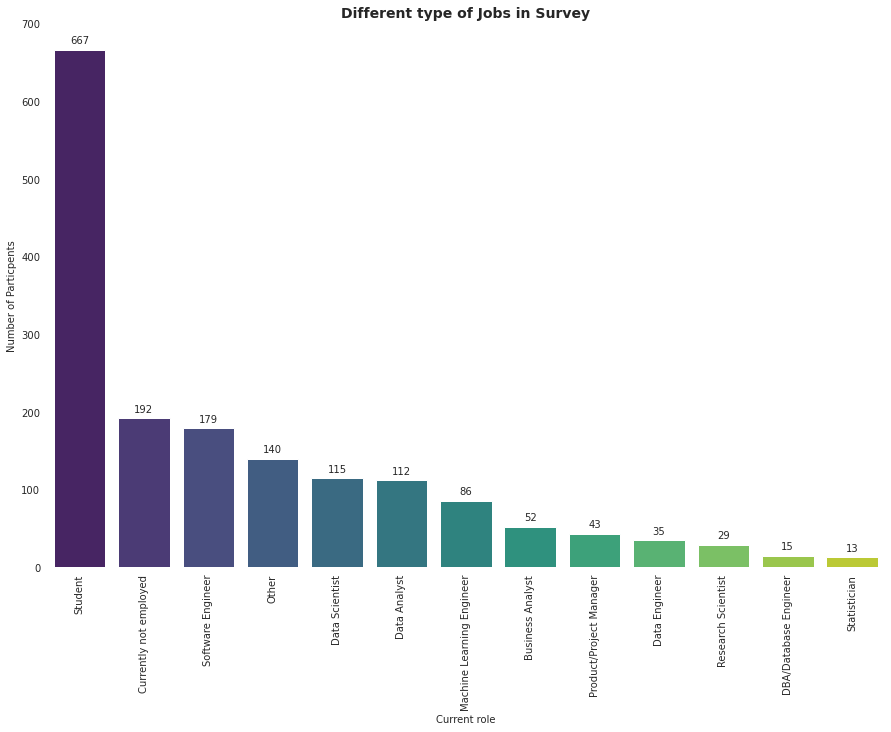

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
XP=Kaggle_NDegree.Q5.value_counts().sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,x=XP.index,y='Q5',palette="viridis")
ax.set_title('Different type of Jobs in Survey',fontsize=14, fontweight='bold')

ax.set_xlabel('Current role')
ax.set_ylabel('Number of Particpents')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

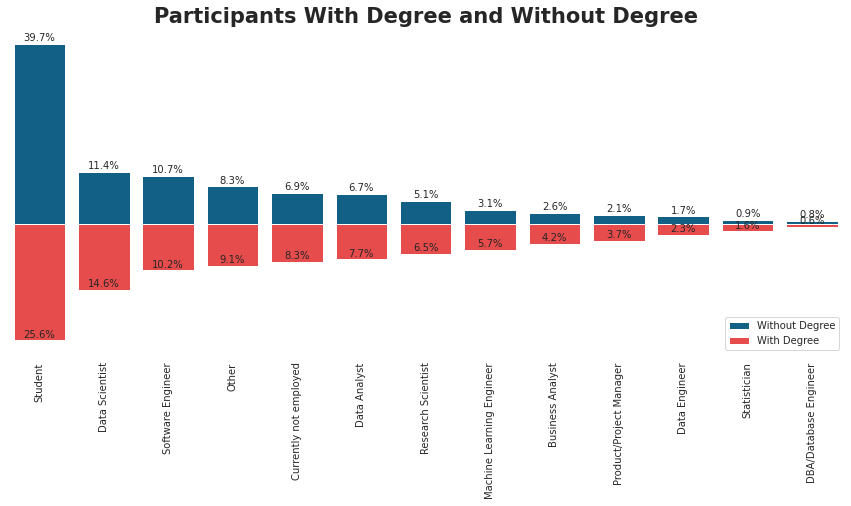

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

XP=Kaggle_NDegree.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
XP1=Kaggle_WDegree.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,y='Q5',x=XP.index,color="#006699",label='Without Degree')
ax=sns.barplot(data=-XP1,y='Q5',x=XP1.index,color="#ff3333",label='With Degree')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participants With Degree and Without Degree',fontsize=21, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
#annotate
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(abs(100*p.get_height())), 
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,6), 
                   textcoords = 'offset points')
ax.set_yticks([])    
ax.legend(loc='lower right');

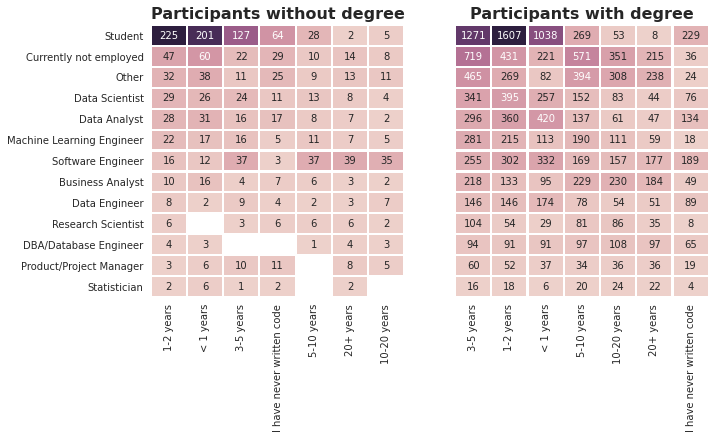

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
K_heat = []
for i in Kaggle_NDegree.Q6.value_counts().index.to_list():
    K_heat.append(Kaggle_NDegree.Q5.loc[Kaggle_NDegree.Q6 == str(i)].value_counts().to_frame().rename(columns={'Q5':str(i)}))
res_K_heat = pd.concat(K_heat, axis=1)
K_heat_W = []
for i in Kaggle_WDegree.Q6.value_counts().index.to_list():
    K_heat_W.append(Kaggle_WDegree.Q5.loc[Kaggle_WDegree.Q6 == str(i)].value_counts().to_frame().rename(columns={'Q5':str(i)}))
res_K_heat_W = pd.concat(K_heat_W, axis=1)


ax0 = sns.heatmap(res_K_heat, linewidths=1.2, cbar=False, annot=True, fmt='g',cmap=sns.cubehelix_palette(as_cmap=True),ax=ax[0])
ax1= sns.heatmap(res_K_heat_W, linewidths=1.2, cbar=False, annot=True, fmt='g',cmap=sns.cubehelix_palette(as_cmap=True),ax=ax[1])

ax0.set_title('Participants without degree',fontsize=16, fontweight='bold')
ax1.set_title('Participants with degree',fontsize=16, fontweight='bold')
ax1.set_yticks([]);

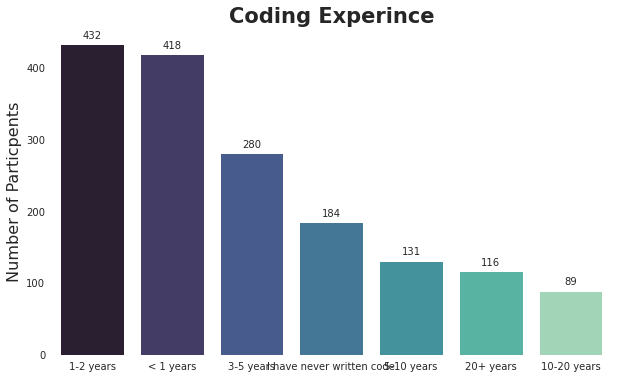

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
XP=Kaggle_NDegree.Q6.value_counts().sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,x=XP.index,y='Q6',palette="mako")
ax.set_title('Coding Experince',fontsize=21, fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Number of Particpents',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

In [10]:
MostXP=Kaggle_NDegree[(Kaggle_NDegree.Q6 != "1-2 years") &
              (Kaggle_NDegree.Q6 != "<1years") &
              (Kaggle_NDegree.Q6 != "3-5 years")&
              (Kaggle_NDegree.Q6 != "I have never written code")]

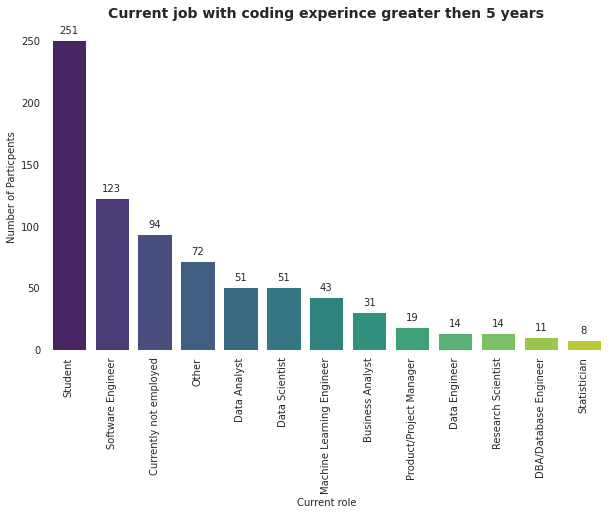

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
XP=MostXP.Q5.value_counts().sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,x=XP.index,y='Q5',palette="viridis")
ax.set_title('Current job with coding experince greater then 5 years',fontsize=14, fontweight='bold')

ax.set_xlabel('Current role')
ax.set_ylabel('Number of Particpents')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

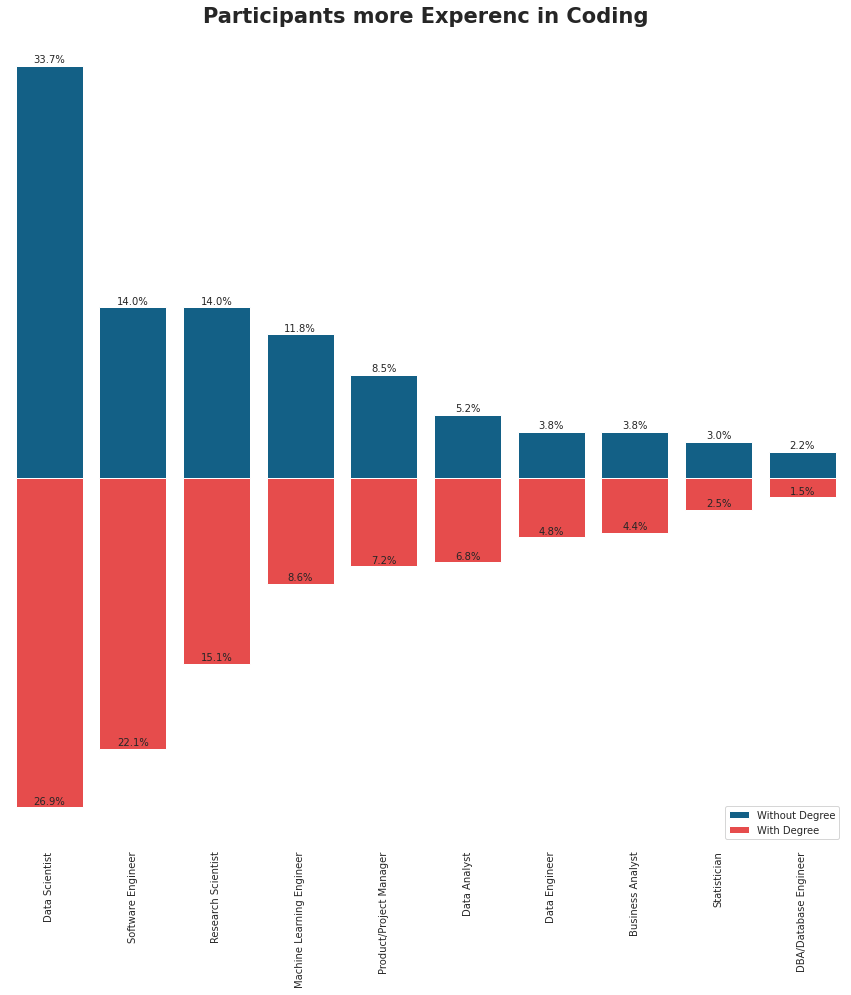

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

MostXP1=MostXP[(MostXP.Q5 != "Student")&(MostXP.Q5 != "Other")&(MostXP.Q5 != "Currently not employed")]
Kaggle1=Kaggle_WDegree[(Kaggle_WDegree.Q5 != "Student")&(Kaggle_WDegree.Q5 != "Other")&(Kaggle_WDegree.Q5 != "Currently not employed")]
Kaggle1=Kaggle1[(Kaggle1.Q6 != "1-2 years") &
              (Kaggle1.Q6 != "< 1 years") &
              (Kaggle1.Q6 != "3-5 years")&
              (Kaggle1.Q6 != "I have never written code")]
XP=MostXP1.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
XP1=Kaggle1.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,y='Q5',x=XP.index,color="#006699",label='Without Degree')
ax=sns.barplot(data=-XP1,y='Q5',x=XP1.index,color="#ff3333",label='With Degree')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participants more Experenc in Coding',fontsize=21, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
#annotate
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(abs(100*p.get_height())), 
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,6), 
                   textcoords = 'offset points')
ax.set_yticks([])    
ax.legend(loc='lower right');



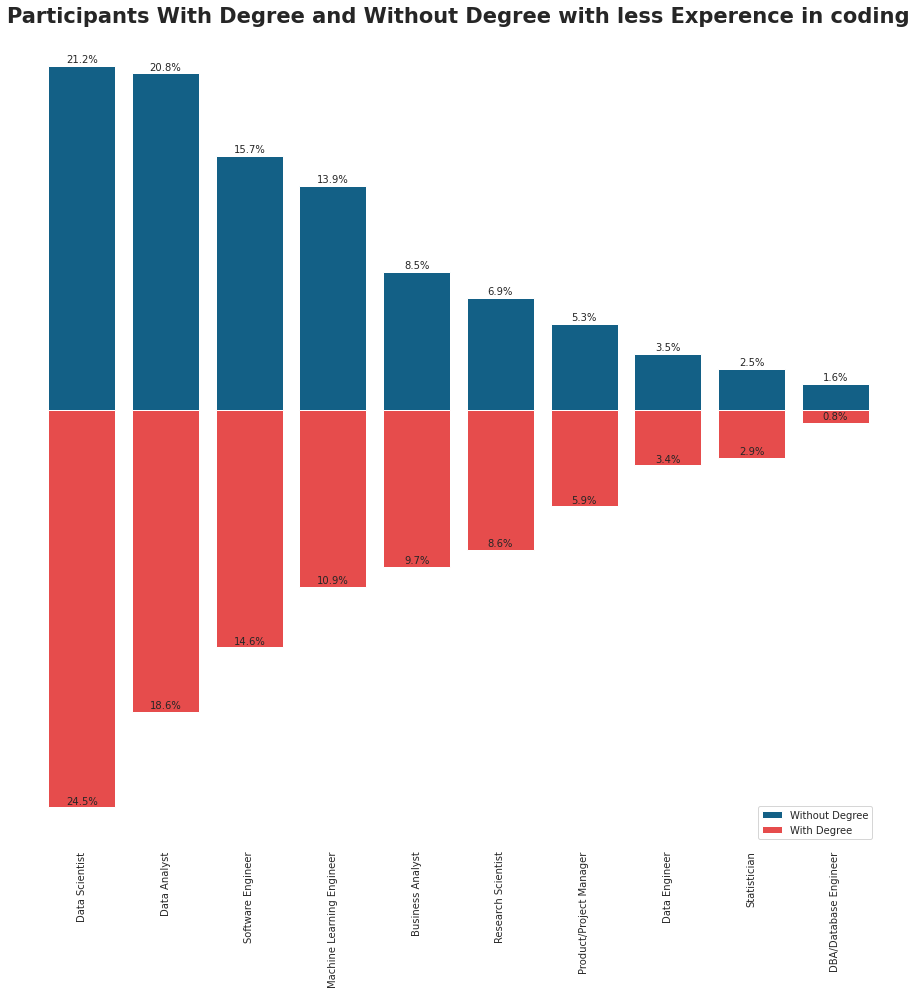

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
Kaggle_NXP=Kaggle_NDegree[(Kaggle_NDegree.Q5 != "Student")&(Kaggle_NDegree.Q5 != "Other")&(Kaggle_NDegree.Q5 != "Currently not employed")]
Kaggle_NXP=Kaggle_NXP[(Kaggle_NXP.Q6 == "1-2 years") |
              (Kaggle_NXP.Q6 == "< 1 years") |
              (Kaggle_NXP.Q6 == "3-5 years")|
              (Kaggle_NXP.Q6 == "I have never written code")]

Kaggle_WXP=Kaggle_WDegree[(Kaggle_WDegree.Q5 != "Student")&(Kaggle_WDegree.Q5 != "Other")&(Kaggle_WDegree.Q5 != "Currently not employed")]
Kaggle_WXP=Kaggle_WXP[(Kaggle_WXP.Q6 == "1-2 years") |
              (Kaggle_WXP.Q6 == "< 1 years") |
              (Kaggle_WXP.Q6 == "3-5 years")|
              (Kaggle_WXP.Q6 == "I have never written code")]

XP=Kaggle_NXP.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
XP1=Kaggle_WXP.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,y='Q5',x=XP.index,color="#006699",label='Without Degree')
ax=sns.barplot(data=-XP1,y='Q5',x=XP1.index,color="#ff3333",label='With Degree')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participants With Degree and Without Degree with less Experence in coding',fontsize=21, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
#annotate
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(abs(100*p.get_height())), 
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,6), 
                   textcoords = 'offset points')
ax.set_yticks([])    
ax.legend(loc='lower right');

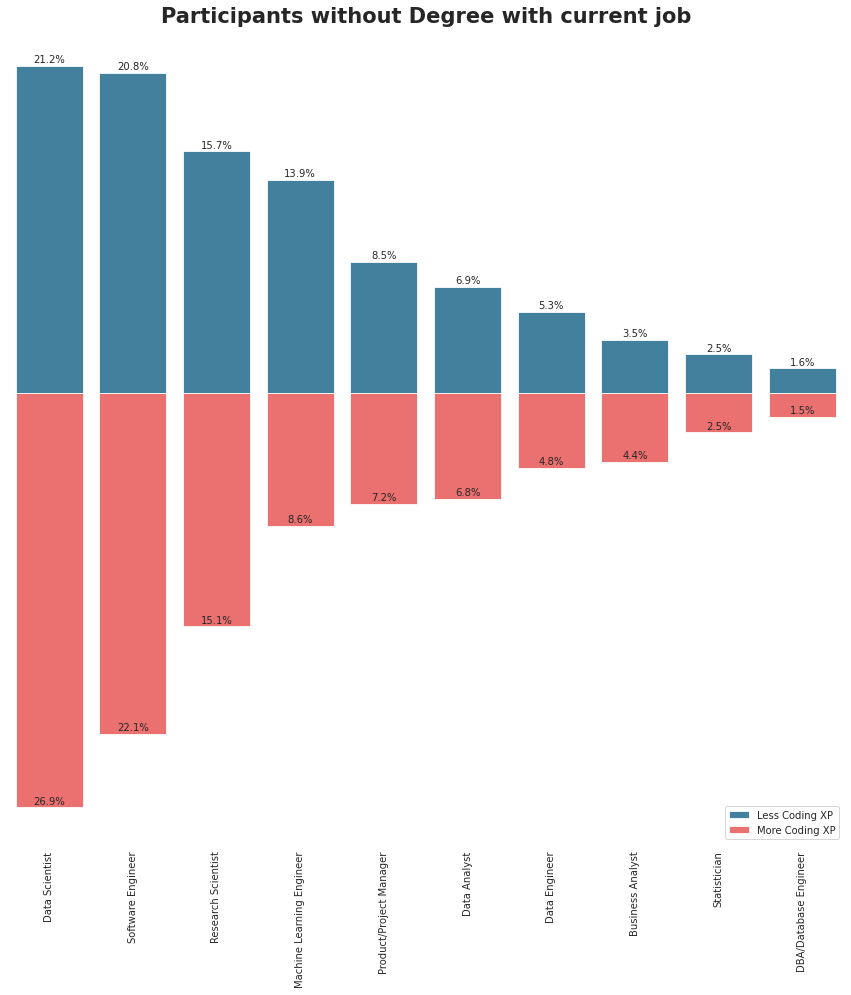

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
Kaggle_NXP=Kaggle_NDegree[(Kaggle_NDegree.Q5 != "Student")&(Kaggle_NDegree.Q5 != "Other")&(Kaggle_NDegree.Q5 != "Currently not employed")]
Kaggle_NXP=Kaggle_NXP[(Kaggle_NXP.Q6 == "1-2 years") |
              (Kaggle_NXP.Q6 == "< 1 years") |
              (Kaggle_NXP.Q6 == "3-5 years")|
              (Kaggle_NXP.Q6 == "I have never written code")]

Kaggle_NoXP=Kaggle_NDegree[(Kaggle_NDegree.Q5 != "Student")&(Kaggle_NDegree.Q5 != "Other")&(Kaggle_NDegree.Q5 != "Currently not employed")]
Kaggle_NoXP=Kaggle_NoXP[(Kaggle_NoXP.Q6 != "1-2 years") &
              (Kaggle_NoXP.Q6 != "< 1 years") &
              (Kaggle_NoXP.Q6 != "3-5 years")&
              (Kaggle_NoXP.Q6 != "I have never written code")]
XP=Kaggle_NXP.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
XP1=Kaggle1.Q5.value_counts(normalize=True).sort_values(ascending=False).to_frame()
ax=sns.barplot(data=XP,y='Q5',x=XP.index,color="#006699",alpha=0.8,label='Less Coding XP')
ax=sns.barplot(data=-XP1,y='Q5',x=XP1.index,color="#ff3333",alpha=0.8,label='More Coding XP')




ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participants without Degree with current job',fontsize=21, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
#annotate
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(abs(100*p.get_height())), 
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,6), 
                   textcoords = 'offset points')
ax.set_yticks([])    
ax.legend(loc='lower right');

In [15]:
Unemployed=round(Kaggle_NDegree.Q5.value_counts(normalize=True).loc["Currently not employed"]*100,2)

employed=round(Kaggle_WDegree.Q5.value_counts(normalize=True).loc["Currently not employed"]*100,2)
[{"Unemployed without Degree":Unemployed,"Unemployed with Degree":employed}]

[{'Unemployed without Degree': 11.44, 'Unemployed with Degree': 8.3}]